In [13]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

In [32]:
import statsmodels.api as sm

In [16]:
import requests
from io import BytesIO

url = "https://www.stata-press.com/data/r17/wpi1.dta"
response = requests.get(url)
data = pd.read_stata(BytesIO(response.content))


In [17]:
data

,wpi,t,ln_wpi
0,30.700001,1960-01-01,3.424263
1,30.799999,1960-04-01,3.427515
2,30.700001,1960-07-01,3.424263
3,30.700001,1960-10-01,3.424263
4,30.799999,1961-01-01,3.427515
...,...,...,...
119,109.400002,1989-10-01,4.695011
120,111.000000,1990-01-01,4.709530
121,110.800003,1990-04-01,4.707727
122,112.800003,1990-07-01,4.725616


In [18]:
data.set_index=data.t

In [19]:
data.drop('t',axis=1)

,wpi,ln_wpi
0,30.700001,3.424263
1,30.799999,3.427515
2,30.700001,3.424263
3,30.700001,3.424263
4,30.799999,3.427515
...,...,...
119,109.400002,4.695011
120,111.000000,4.709530
121,110.800003,4.707727
122,112.800003,4.725616


In [20]:
data['log']=np.log(data['wpi'])

In [21]:
data['dif']=data['log'].diff()

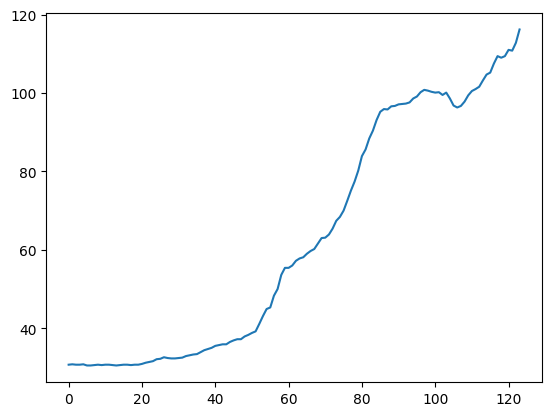

In [24]:
plt.plot(data.index,data['wpi'])

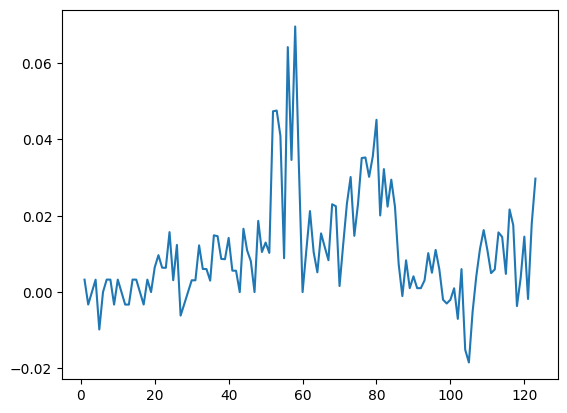

In [26]:
plt.plot(data.index,data['dif'])

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

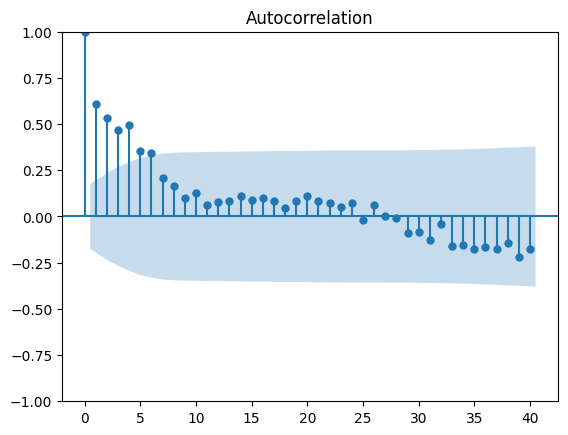

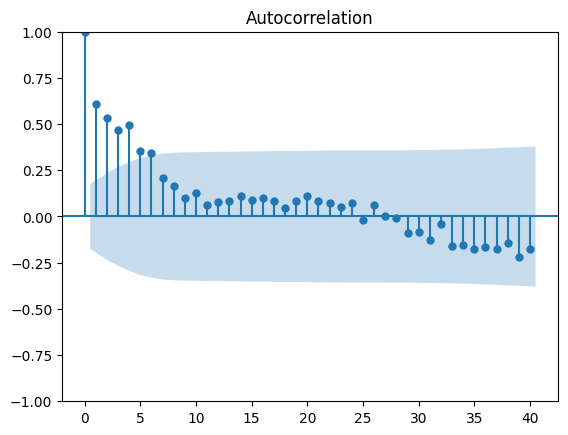

In [29]:
plot_acf(data.iloc[1:]['dif'],lags=40)

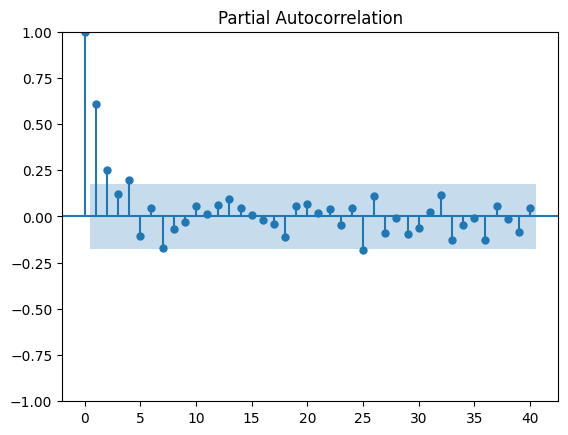

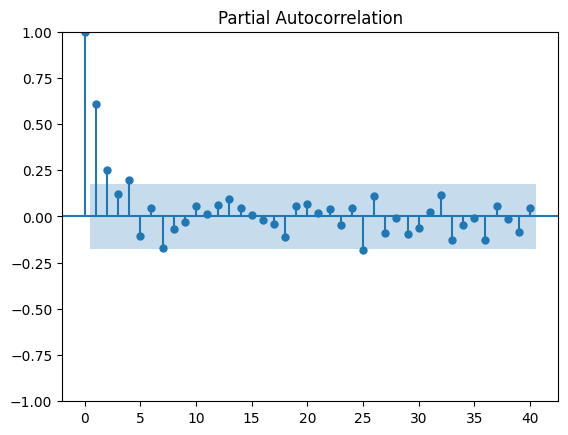

In [30]:
plot_pacf(data.iloc[1:]['dif'],lags=40)

In [33]:
mod=sm.tsa.statespace.SARIMAX(data['log'],trend='c',order=(1,1,1))
res=mod.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    log   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 382.427
Date:                Tue, 06 May 2025   AIC                           -756.854
Time:                        13:19:20   BIC                           -745.605
Sample:                             0   HQIC                          -752.285
                                - 124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.318      0.188      -0.001       0.003
ar.L1          0.8838      0.043     20.668      0.000       0.800       0.968
ma.L1         -0.4779      0.092     -5.203      0.000      -0.658      -0.298
sigma2         0.0001   9.74e-06     11.897      0.000    9.68e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""